In [1]:
import numpy as np
import pandas as pd
import openturns as ot
from matplotlib import cm
import matplotlib.pyplot as plt
from bancs import *
import matplotlib as mpl
from matplotlib.colors import ListedColormap

In [2]:
from matplotlib import rc, rcParams, style
#style.use('default')
rcParams['text.usetex'] = True
#rcParams['text.latex.unicode'] = True
rc('font', **{'family': 'Times'})
rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=16)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size

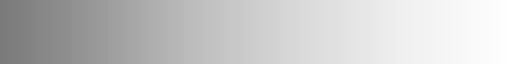

In [3]:
greys = mpl.colormaps['Greys_r']
faded_greys = ListedColormap(greys(np.linspace(0.4, 1, 128)))
faded_greys

In [4]:
g = ot.SymbolicFunction(["x1", "x2"], ["(x1 - x2) ^ 2 - 8 * (x1 + x2 - 5)"])
X = ot.ComposedDistribution([ot.Normal(0., 1.)] * 2)
Y = ot.CompositeRandomVector(g, ot.RandomVector(X))
threshold = 0.
failure_event = ot.ThresholdEvent(Y, ot.LessOrEqual(), threshold)

## BANCS

Quantiles = [32.79889269 20.6050719  11.63358221  5.23626618  0.95579044 -2.82049025]
Proba EBC = 7.63e-05


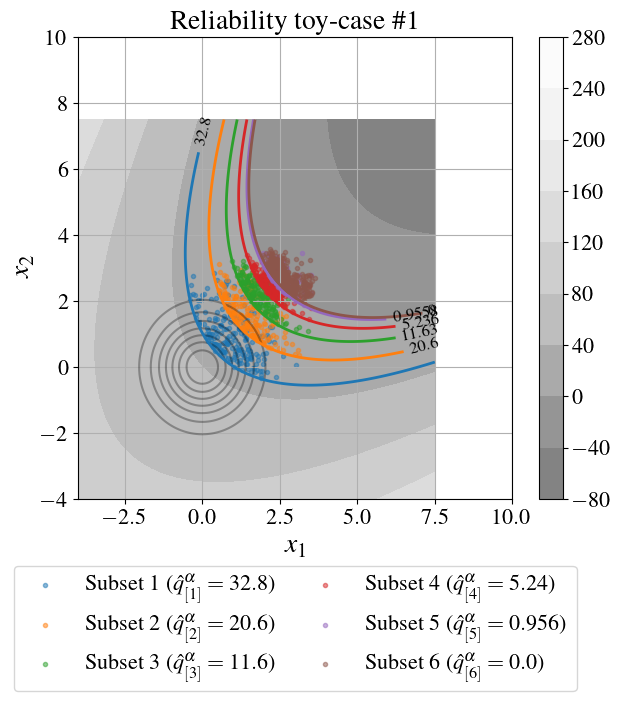

In [5]:
N = int(1e3)
bancs = BANCS(failure_event, N=N, M=6, p0=0.2)
quantiles = bancs.run()
pf = bancs.compute_pf()
df = bancs.df
print("Quantiles =", quantiles)
print("Proba EBC = {:.2e}".format(pf))
fig = bancs.draw_2D_BANCS(title="Reliability toy-case \#1", colorbar=faded_greys)
plt.grid()
plt.xlim(-4, 10)
plt.ylim(-4, 10);

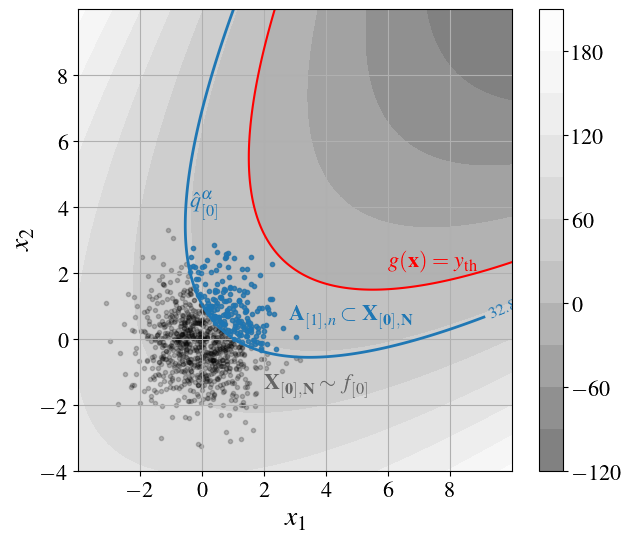

In [6]:
i = 0
d = DrawFunctions()
d.set_bounds([-4] * 2, [10] * 2)
d.draw_2D_controur(title="", function=g, distribution=None, colorbar=faded_greys, contour_values=False)
ssample = df[(df["Subset"]==i) & (df["Y"] <= quantiles[i])]
ssample_full = df[(df["Subset"]==i)]
sslabel = "Subset {} ($q_{{p_0}}^{} = {:.3}$)".format(i, i, quantiles[i])
# Scatter plots
plt.scatter(ssample_full["X0"].values, ssample_full["X1"].values, color='k', marker='.', alpha=0.2)
plt.scatter(ssample["X0"].values, ssample["X1"].values, color='C0', marker='.', alpha=0.7, zorder=3)
# Quantile contours
contour = plt.contour(d.X0, d.X1, d.Z, levels=[quantiles[i]], colors='C{}'.format(i), linewidths=2, linestyles=['solid'])
plt.clabel(contour, inline=True, fontsize=12, colors='C{}'.format(i))
contour = plt.contour(d.X0, d.X1, d.Z, levels=[threshold], colors='red')
# Texts
plt.text(2, -1.5, "$\\mathbf{X_{[0], N}} \sim f_{[0]}$", fontsize=16, color='k', alpha=0.5)
plt.text(2.8, 0.6, "$\\mathbf{A}_{[1], n} \\subset \\mathbf{X_{[0], N}}$", fontsize=16, color='C0')
plt.text(6, 2.2, "$g(\\mathbf{x}) = y_{\mathrm{th}}$", fontsize=16, color='red')
plt.text(-0.4, 4, "$\\hat{q}_{[0]}^\\alpha$", fontsize=16, color='C0')
# Options
plt.xticks(range(-2, 10, 2))
plt.yticks(range(-4, 10, 2))
plt.grid()
plt.savefig("figures/bancs_illustration0.jpg", bbox_inches='tight', dpi=300);

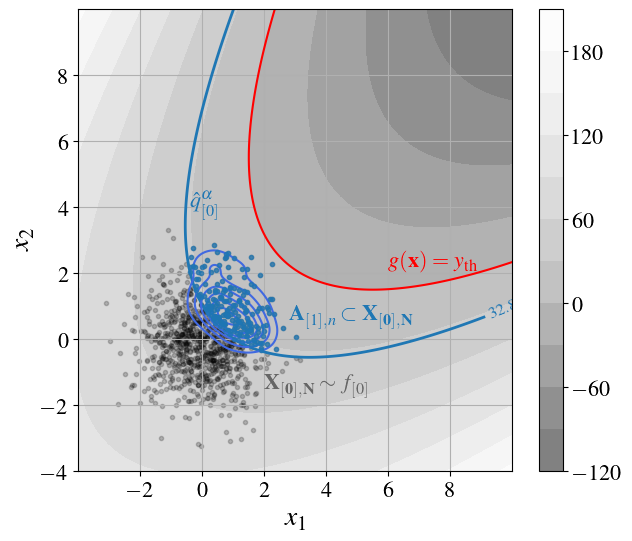

In [7]:
i = 0
d = DrawFunctions()
d.set_bounds([-4] * 2, [10] * 2)
d.draw_2D_controur(title="", function=g, distribution=None, colorbar=faded_greys, contour_values=False)
ssample = df[(df["Subset"]==i) & (df["Y"] <= quantiles[i])]
ssample_full = df[(df["Subset"]==i)]
sslabel = "Subset {} ($q_{{p_0}}^{} = {:.3}$)".format(i, i, quantiles[i])
# Scatter plots
plt.scatter(ssample_full["X0"].values, ssample_full["X1"].values, color='k', marker='.', alpha=0.2)
plt.scatter(ssample["X0"].values, ssample["X1"].values, color='C0', marker='.', alpha=0.7, zorder=3)
# Quantile contours
contour = plt.contour(d.X0, d.X1, d.Z, levels=[quantiles[i]], colors='C{}'.format(i), linewidths=2, linestyles=['solid'])
plt.clabel(contour, inline=True, fontsize=12, colors='C{}'.format(i))
contour = plt.contour(d.X0, d.X1, d.Z, levels=[threshold], colors='red')
# Conditional distribution contours
d.set_bounds([-1] * 2, [3] * 2)
Xcond = bancs.conditional_distributions[i+1]
Zpdf = np.array(Xcond.computePDF(d.nodes)).reshape(d.grid_size, d.grid_size)
plt.contour(d.X0, d.X1, Zpdf, 6, corner_mask=False, colors='royalblue', zorder=2)
# Texts
plt.text(2, -1.5, "$\\mathbf{X_{[0], N}} \sim f_{[0]}$", fontsize=16, color='k', alpha=0.5)
plt.text(2.8, 0.6, "$\\mathbf{A}_{[1], n} \\subset \\mathbf{X_{[0], N}}$", fontsize=16, color='C0')
plt.text(6, 2.2, "$g(\\mathbf{x}) = y_{\mathrm{th}}$", fontsize=16, color='red')
plt.text(-0.4, 4, "$\\hat{q}_{[0]}^\\alpha$", fontsize=16, color='C0')
# Options
plt.xticks(range(-2, 10, 2))
plt.yticks(range(-4, 10, 2))
plt.grid()
plt.savefig("figures/bancs_illustration1.jpg", bbox_inches='tight', dpi=300);

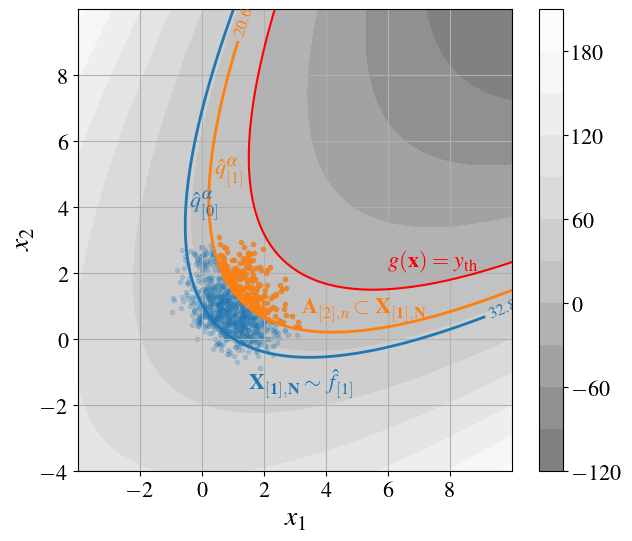

In [8]:
d = DrawFunctions()
d.set_bounds([-4] * 2, [10] * 2)
d.draw_2D_controur(title="", function=g, distribution=None, colorbar=faded_greys, contour_values=False)

c = ['C0', 'C1']
i = 1
ssample = df[(df["Subset"]==i) & (df["Y"] <= quantiles[i])]
ssample_full = df[(df["Subset"]==i)]
sslabel = "Subset {} ($q_{{p_0}}^{} = {:.3}$)".format(i, i, quantiles[i])
# Scatters
plt.scatter(ssample_full["X0"].values, ssample_full["X1"].values, color=c[0], marker='.', alpha=0.2)
plt.scatter(ssample["X0"].values, ssample["X1"].values, color=c[1], marker='.', alpha=0.7, zorder=3)
# Quantiles contours
for idx in range(i+1): 
    contour = plt.contour(d.X0, d.X1, d.Z, levels=[quantiles[idx]], colors=c[idx], linewidths=2, linestyles=['solid'])
    plt.clabel(contour, inline=True, fontsize=12, colors=c[idx])
contour = plt.contour(d.X0, d.X1, d.Z, levels=[threshold], colors='red')

# Texts
plt.text(1.5, -1.5, "$\\mathbf{X_{[1], N}} \sim \\hat{f}_{[1]}$", fontsize=16, color=c[0])
plt.text(3.2, 0.8, "$\\mathbf{A}_{[2], n} \\subset \\mathbf{X_{[1], N}}$", fontsize=16, color=c[1])
plt.text(6, 2.2, "$g(\\mathbf{x}) = y_{\mathrm{th}}$", fontsize=16, color='red')
plt.text(-0.4, 4, "$\\hat{q}_{[0]}^\\alpha$", fontsize=16, color=c[0])
plt.text(0.4, 5, "$\\hat{q}_{[1]}^\\alpha$", fontsize=16, color=c[1])
# Options2.2
plt.xticks(range(-2, 10, 2))
plt.yticks(range(-4, 10, 2))
plt.grid()
plt.savefig("figures/bancs_illustration2.jpg", bbox_inches='tight', dpi=300);

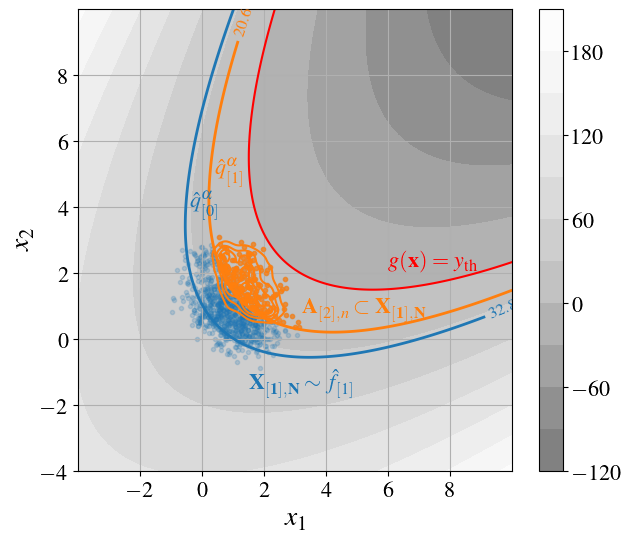

In [9]:
d = DrawFunctions()
d.set_bounds([-4] * 2, [10] * 2)
d.draw_2D_controur(title="", function=g, distribution=None, colorbar=faded_greys, contour_values=False)

c = ['C0', 'C1']
i = 1
ssample = df[(df["Subset"]==i) & (df["Y"] <= quantiles[i])]
ssample_full = df[(df["Subset"]==i)]
sslabel = "Subset {} ($q_{{p_0}}^{} = {:.3}$)".format(i, i, quantiles[i])
# Scatters
plt.scatter(ssample_full["X0"].values, ssample_full["X1"].values, color=c[0], marker='.', alpha=0.2)
plt.scatter(ssample["X0"].values, ssample["X1"].values, color=c[1], marker='.', alpha=0.7, zorder=3)
# Quantiles contours
for idx in range(i+1): 
    contour = plt.contour(d.X0, d.X1, d.Z, levels=[quantiles[idx]], colors=c[idx], linewidths=2, linestyles=['solid'])
    plt.clabel(contour, inline=True, fontsize=12, colors=c[idx])
contour = plt.contour(d.X0, d.X1, d.Z, levels=[threshold], colors='red')
# Conditional distribution contours
d.set_bounds([0] * 2, [4] * 2)
Xcond = bancs.conditional_distributions[i+1]
Zpdf = np.array(Xcond.computePDF(d.nodes)).reshape(d.grid_size, d.grid_size)
plt.contour(d.X0, d.X1, Zpdf, 6, corner_mask=False, colors=c[1], zorder=2)

# Texts
plt.text(1.5, -1.5, "$\\mathbf{X_{[1], N}} \sim \\hat{f}_{[1]}$", fontsize=16, color=c[0])
plt.text(3.2, 0.8, "$\\mathbf{A}_{[2], n} \\subset \\mathbf{X_{[1], N}}$", fontsize=16, color=c[1])
plt.text(6, 2.2, "$g(\\mathbf{x}) = y_{\mathrm{th}}$", fontsize=16, color='red')
plt.text(-0.4, 4, "$\\hat{q}_{[0]}^\\alpha$", fontsize=16, color=c[0])
plt.text(0.4, 5, "$\\hat{q}_{[1]}^\\alpha$", fontsize=16, color=c[1])
# Options2.2
plt.xticks(range(-2, 10, 2))
plt.yticks(range(-4, 10, 2))
plt.grid()
plt.savefig("figures/bancs_illustration3.jpg", bbox_inches='tight', dpi=300);

## Bernstein polynomials

In [10]:
import math
def bernstein_polynomial(t, m, u):
    return math.comb(m, t) * (u ** t) * (1 - u) ** (m - t)     

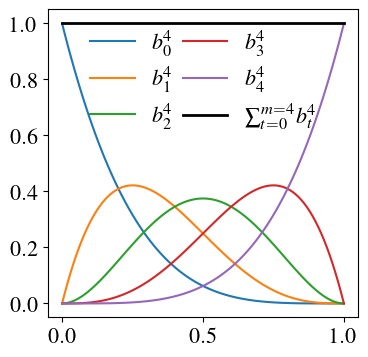

In [11]:
x_plot = np.linspace(0, 1, 100)

plt.figure(figsize=(4, 4))
m = 4
for t in range(m+1):
    lab = fr"$b_{t}^4$"
    plt.plot(x_plot, bernstein_polynomial(t, m, x_plot), label=lab)
plt.plot(x_plot, [1]*100, color='k', label="$\sum_{t=0}^{m=4} b_{t}^4$", linewidth=2.)
plt.legend(loc="upper center", ncol=2, frameon=False, columnspacing=0.5)
plt.savefig("figures/bernstein_pol.pdf");

In [12]:
def bernstein_approx(m, func, u):
    approx = 0 
    for t in np.arange(0, m):
        approx += func(t/m) * bernstein_polynomial(t, m, u)
    return approx

def bernstein_approx(m, func, u):
    return sum([func(j/m) * bernstein_polynomial(j, m, u) for j in range(m+1)])

def consin(u):
    return np.cos(10 * u)

#np.cos(xplot) + 0.01 * xplot**2

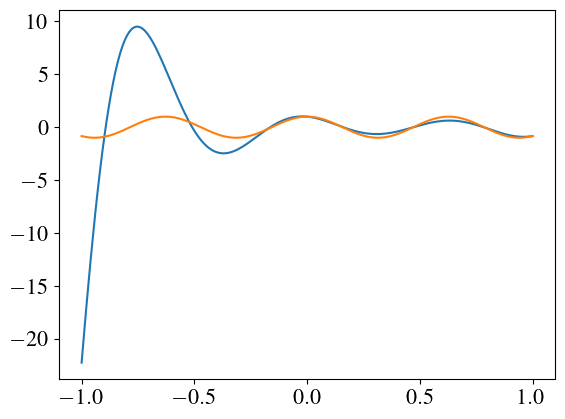

In [13]:
xplot = np.linspace(-1, 1, 200)
m = 25
consin_approx = [bernstein_approx(m, consin, x) for x in xplot]
plt.plot(xplot, consin_approx)
plt.plot(xplot, np.cos(xplot * 10) );

In [14]:

from math import factorial

def binominal(n, k):
    return factorial(n) // factorial(k) // factorial(n-k)

def bernstein(n, k, x):
    return binominal(n, k) * x**k * (1-x)**(n-k)

def expand(func, x, n):
    return sum([func(j/n) * bernstein(n, j, x) for j in range(n+1)])

In [15]:
n = 10
for j in range(n+1):
    x = j / n
    f = lambda x: x**2
    approx = lambda x: x**2 + x*(1-x)/n
    print("%.1f: %.4f %.4f %.4f" % (x, f(x), expand(f, x, n), approx(x)))

0.0: 0.0000 0.0000 0.0000
0.1: 0.0100 0.0190 0.0190
0.2: 0.0400 0.0560 0.0560
0.3: 0.0900 0.1110 0.1110
0.4: 0.1600 0.1840 0.1840
0.5: 0.2500 0.2750 0.2750
0.6: 0.3600 0.3840 0.3840
0.7: 0.4900 0.5110 0.5110
0.8: 0.6400 0.6560 0.6560
0.9: 0.8100 0.8190 0.8190
1.0: 1.0000 1.0000 1.0000


In [16]:
from scipy.interpolate import BPoly
u = [0, 1]
c = [[1], [2], [3]]
bp = BPoly(c, u)
bp(2)

array(5.)